# GeoOptimizer Example

This notebook demonstrates how to use the *nugget*'s GeoOptimizer class for point geometry optimization.

In [1]:
# Import the GeoOptimizer class
# from nugget import GeoOptimizer
import nugget
import importlib
from nugget.utils import vis_tools as vis
from nugget.utils import geometries as geom
import matplotlib.pyplot as plt

## Continuous String + RBF Optimization Example

This example shows how to use the GeoOptimizer to optimize a "continuous string" geometry using the error of reproduced surrogate functions with RBF interpolation as a loss.

In [ ]:
# Create a GeoOptimizer instance
rbf_optimizer = nugget.GeoOptimizer(
    dim=3,                      # 3D space
    domain_size=2.0,            # Domain size from -1 to 1
    epsilon=30.0,               # RBF kernel parameter
    # Common optimization parameters
    num_test_points=2000,       # Number of test points to evaluate interpolated function output
    batch_size=200,             # Batch size for sample of surrogate functions
    learning_rate=0.01,         # Learning rate for optimization of path values (z-values)
    repulsion_weight=0.0001,    # Weight for point repulsion
    boundary_weight=100.0,      # Weight for boundary penalty
    sampling_weight=0.1,        # Weight for sampling bias
    # String-specific parameters
    string_repulsion_weight=0.0001,  # Weight for string repulsion
    optimize_xy=True,                # Whether to optimize string positions
    xy_learning_rate=0.05,           # Learning rate for string positions
    # Scheduler parameters
    lr_scheduler_type='exp',    # Exponential learning rate decay for z-values optimizer
    lr_scheduler_params={'gamma': 0.95},
    xy_lr_scheduler_type='exp', # Exponential decay for XY optimizer
    xy_lr_scheduler_params={'gamma': 0.95}
)

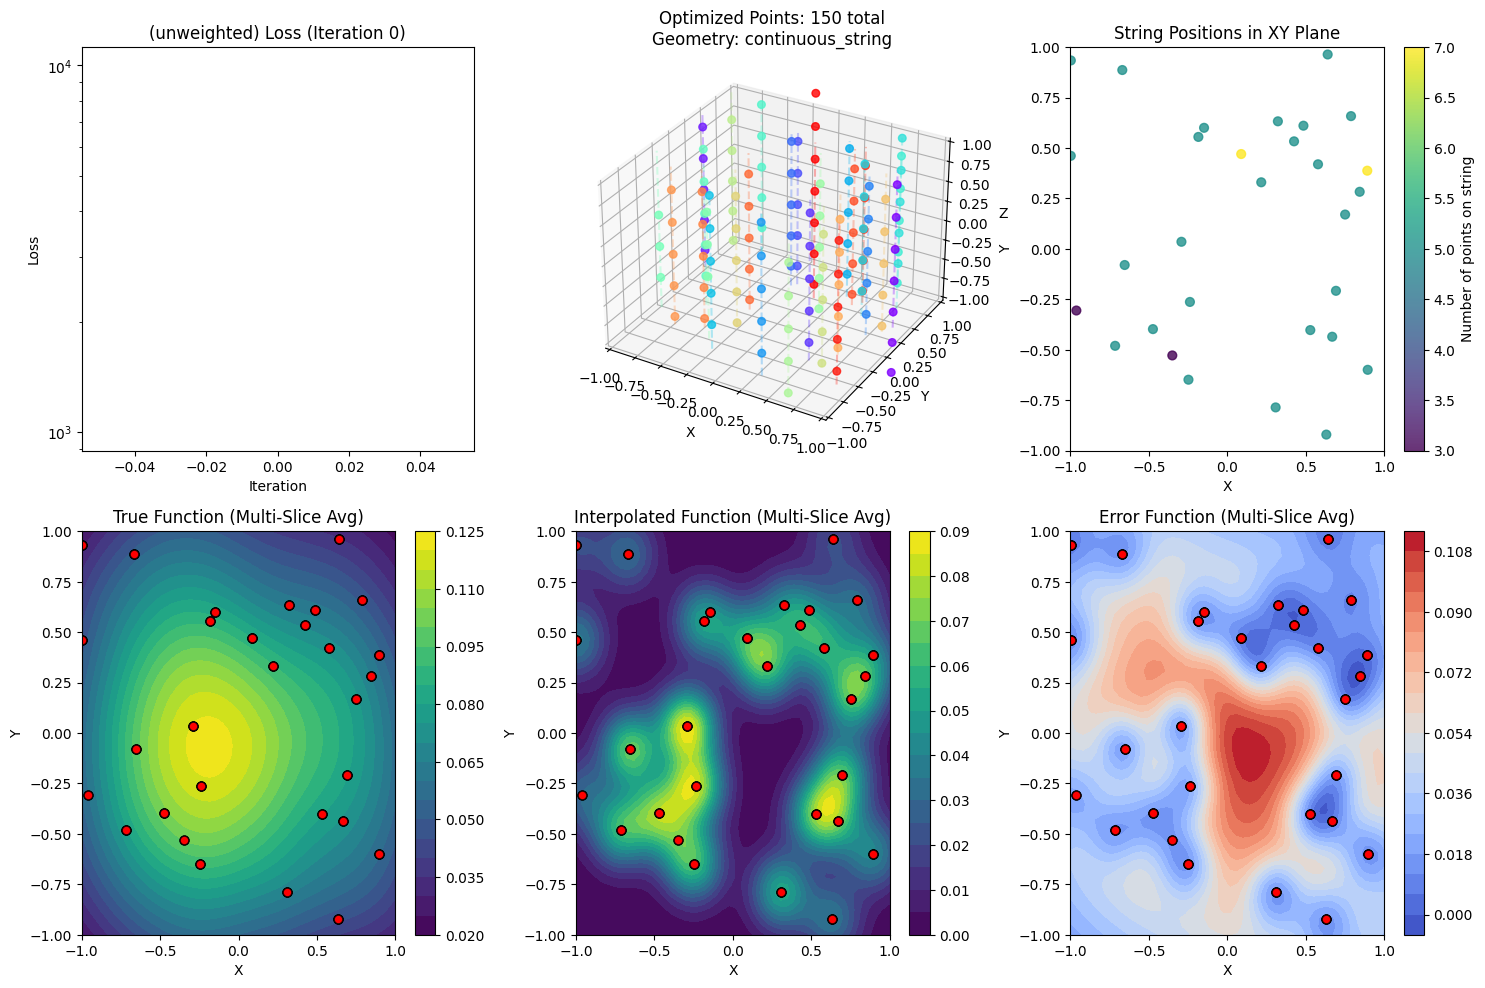

KeyboardInterrupt: 

In [3]:
# Run the optimization using dynamic strings and RBF interpolation loss
rbf_results = rbf_optimizer.optimize(
    geometry_type='continuous_string',   # Use dynamic string geometry
    loss_type='rbf',                     # Use RBF interpolation loss
    
    # Geometric configuration
    n_strings=30,                    # Number of strings
    total_points=150,                # Total number of points
    
    # Optimization parameters
    num_iterations=150,              # Number of iterations
    visualize_every=10,              # Visualization frequency
    num_test_funcs=None,             # Number of test functions to generate
    path_repulsion_weight=0.0,       # Weight for path repulsion
    # Training strategy
    alternating_training=True,       # Use alternating training strategy between string xy and path positions (z-values)
    alternating_steps=10,            # Switch between optimizations every 10 steps
    
    # Additional parameters
    decay_sampling=False,            # Don't decay the sampling weight
    multi_slice=True,                # Use multiple slices for visualization
    plot_types=["uw_loss", "3d_points", "string_xy",'true_function', 'interp_function', 'error_function'], # Types of plots to generate
    make_gif=True,                   # Create a GIF of the optimization process
    gif_plot_selection=["uw_loss","string_xy", "3d_points", 'true_function', 'interp_function', 'error_function'], 
    gif_fps=10,                      # Frames per second for the GIF
    gif_filename='rbf_cs_optimization.gif',  # Output filename for the GIF
)

## SNR Optimization Example

This example demonstrates how to use GeoOptimizer for signal-to-noise ratio optimization with the 'dynamic string' geometry. We first optimize with a uniform background and then run the optimizer again with background with the non-background optimized points as a starting geometry.

In [ ]:
# Create a GeoOptimizer instance for SNR optimization
no_bkg_snr_optimizer = nugget.GeoOptimizer(
    dim=3,                       # 3D space
    domain_size=2.0,             # Domain size from -1 to 1
    epsilon=30.0,                # RBF kernel parameter
    # Common optimization parameters
    batch_size=2,                # Small batch size for SNR optimization
    learning_rate=0.01,          # Learning rate for optimization of z-values
    repulsion_weight=0.00002,    # Weight for point repulsion
    boundary_weight=1e3,         # Weight for boundary penalty
    # String-specific parameters
    string_repulsion_weight=0.00003, # Weight for string repulsion
    optimize_xy=True,                # Whether to optimize string positions
    xy_learning_rate=0.05,           # Learning rate for string positions
    # SNR-specific parameters
    signal_scale=1.0,            # Scale factor for signal functions
    background_scale=10.0,       # Scale factor for background functions
    snr_weight=0.08,             # Weight for SNR loss term
    no_background=True,          # No background functions
    # lr_scheduler_type='exp',    # Exponential learning rate decay
    # lr_scheduler_params={'gamma': 0.95},
    # xy_lr_scheduler_type='exp', # Exponential decay for XY optimizer
    # xy_lr_scheduler_params={'gamma': 0.95}
)

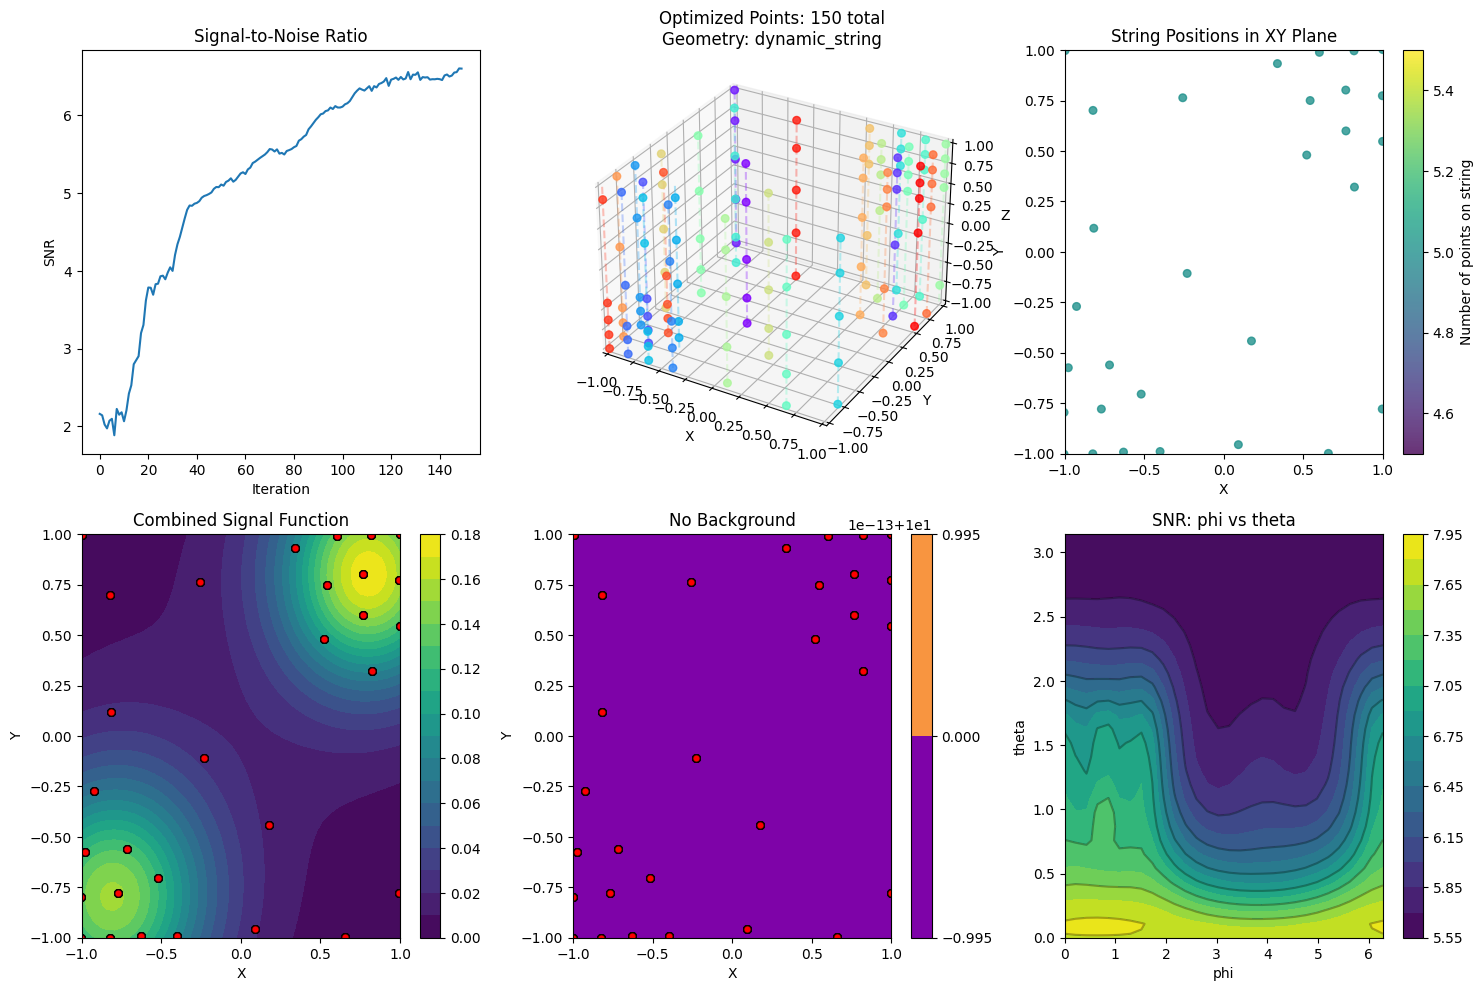

In [ ]:
# Run the optimization using dynamic strings and SNR loss with no background
no_bkg_snr_results = no_bkg_snr_optimizer.optimize(
    geometry_type='dynamic_string',   # Use dynamic string geometry
    loss_type='snr',                  # Use SNR loss function
    
    # Geometric configuration
    n_strings=30,                    # Number of strings
    total_points=150,                # Total number of points
    optimize_positions_only=False,   # Optimize only positions, not distributions
    even_distribution=True,          # Even distribution of points among strings
    
    # Optimization parameters
    num_iterations=150,              # Number of iterations
    visualize_every=10,              # Visualization frequency
    multi_slice=True,                # Use multiple slices for visualization
    batch_size=2,                    # batch size corresponding to keep_param_const (if not matching, it takes a random value from it) 
    path_repulsion_weight=0.0,       # Weight for path repulsion
    # Training strategy
    alternating_training=True,       # Use alternating training strategy
    alternating_steps=10,            # Switch between optimizations every 10 steps
    
    # SNR-specific parameters
    optimize_params=['phi', 'theta'],  # Parameters to optimize over
    num_background_funcs=4,            # Number of randomly generated background functions
    param_grid_size=30,                # Size of optimized parameter grid (for each parameter)
    show_all_signals=False,            # Visualize a small sample of signals
    
    # Keep certain parameters constant, if None random values are taken within default ranges
    keep_param_const={   
        'x': [-0.8, 0.8],              # Constrain x position
        'y': [-0.8, 0.8],              # Constrain y position
        'z': [-0.8, 0.8]               # Constrain z position
    }, 
    
    # Additional parameters
    rand_params_in_grid=False,          # Don't randomly sample from parameter grid of optimized parameters, use whole grid
    rand_other_params=False,            # Don't randomly sample other parameters for every signal keep const across entire grid (but still depends on keep_param_const)
    plot_types=["snr_history","3d_points", "string_xy", "signal_contour", "background_contour",  "parameter_2d"],
    make_gif=True,            
    gif_plot_selection=["snr_history", "3d_points", "string_xy", "signal_contour",'background_contour', "parameter_2d"], 
    gif_fps=7,            
    gif_filename='no_bkg_snr_cs_optimization.gif'  
)

In [ ]:
# Create a GeoOptimizer instance for SNR optimization with background functions
bkg_snr_optimizer = nugget.GeoOptimizer(
    dim=3,                       
    domain_size=2.0,             
    epsilon=30.0,                
    # Common optimization parameters
    batch_size=2,                
    learning_rate=0.01,          
    repulsion_weight=0.00002,   
    boundary_weight=500,         
    # String-specific parameters
    string_repulsion_weight=0.00003, 
    optimize_xy=True,               
    xy_learning_rate=0.05,           
    # SNR-specific parameters
    signal_scale=1.0,            
    background_scale=10.0,       
    snr_weight=0.08,             
    no_background=False,       # Background functions included this time      
    # lr_scheduler_type='exp',     
    # lr_scheduler_params={'gamma': 0.95},
    # xy_lr_scheduler_type='exp', 
    # xy_lr_scheduler_params={'gamma': 0.95}
)

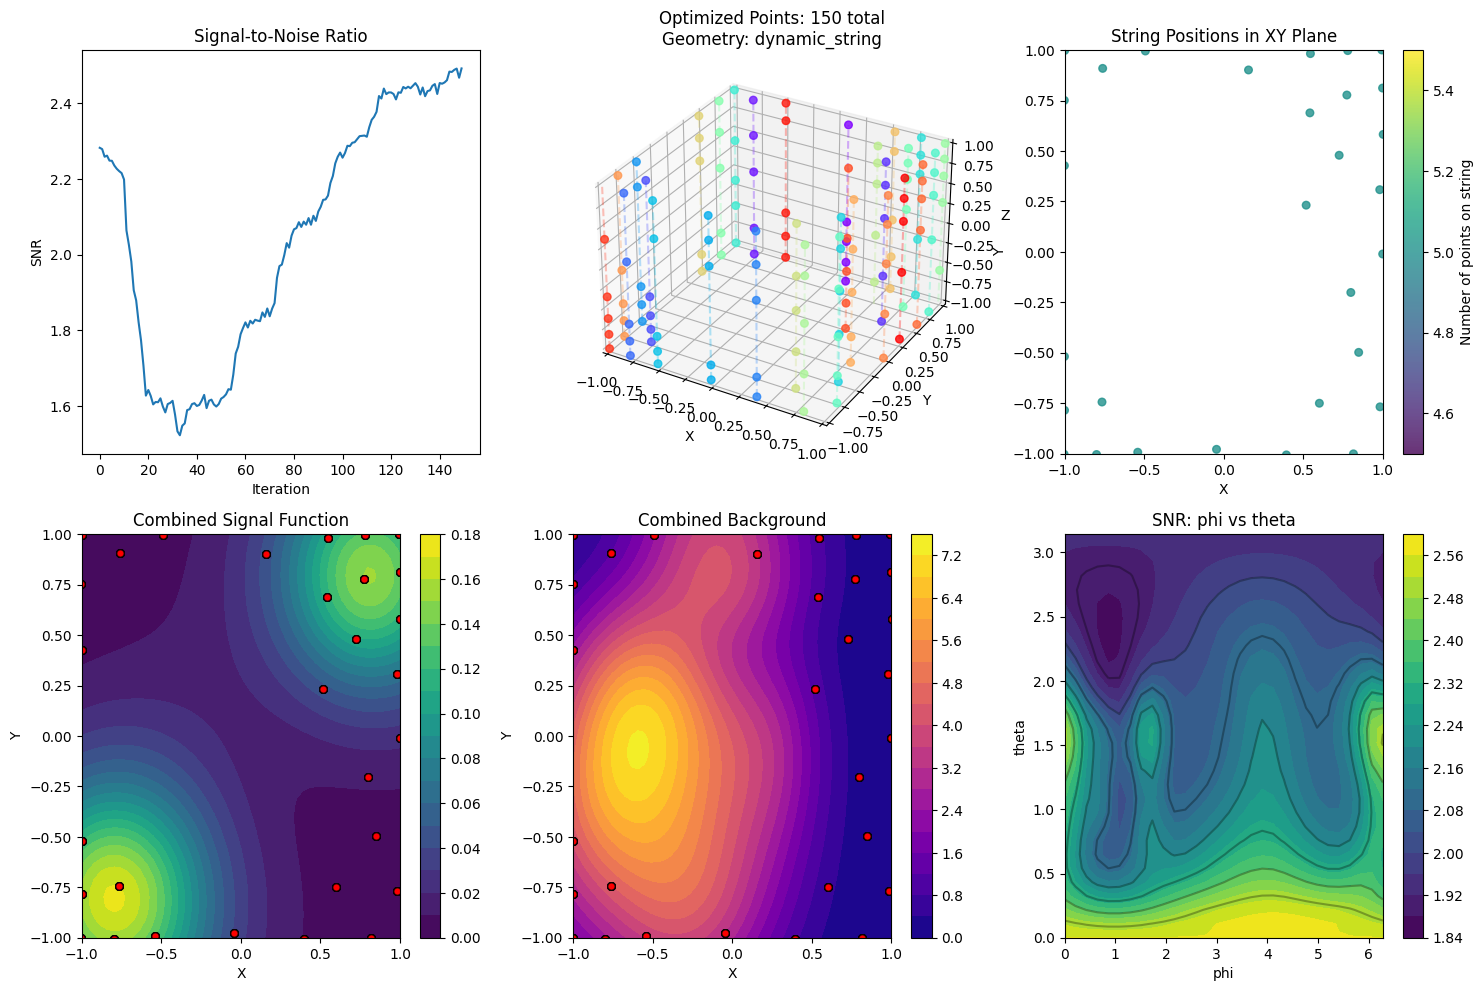

In [ ]:
# Run the optimization using dynamic strings and SNR loss
bkg_snr_results = bkg_snr_optimizer.optimize(
    geometry_type='dynamic_string',   
    loss_type='snr',                  
    initial_geometry_dict=no_bkg_snr_optimizer.clone().geom_dict, # Use the geometry from the previous optimization with built-in clone method
    # Geometric configuration
    n_strings=30,                     
    total_points=150,                 
    optimize_positions_only=False,    
    even_distribution=True,           
    
    # Optimization parameters
    num_iterations=150,              
    visualize_every=10,              
    multi_slice=True,               
    batch_size=2,                    
    # Training strategy
    alternating_training=True,       
    alternating_steps=10,            
    
    # SNR-specific parameters
    optimize_params=['phi', 'theta'],  
    num_background_funcs=4,            
    param_grid_size=30,                
    show_all_signals=False,              
    
    # Keep certain parameters constant
    keep_param_const={
        'x': [-0.8, 0.8],              
        'y': [-0.8, 0.8],             
        'z': [-0.8, 0.8]               
    },
    
    # Additional parameters
    rand_params_in_grid=False,      
    plot_types=["snr_history","3d_points", "string_xy", "signal_contour", "background_contour",  "parameter_2d"],
    make_gif=True,            
    gif_plot_selection=["snr_history", "3d_points", "string_xy", "signal_contour",'background_contour', "parameter_2d"], 
    gif_fps=7,         
    gif_filename='bkg_snr_cs_optimization.gif'  
    
)

## Evanescent Strings + weighted SNR Optimization Example

This example demonstrates how to use GeoOptimizer for signal-to-noise ratio optimization with the 'evanescent string' geometry. Similar to the previous SNR optimization, we optimize for random background signals, but only optimize for string positions by adjusting the "weight" of each string

In [2]:
# Create a GeoOptimizer instance for (string-weighted) SNR optimization with evanescent strings
evanescent_optimizer = nugget.GeoOptimizer(
    dim=3,                       
    domain_size=2.0,                            
    # Common optimization parameters
    batch_size=2,                
    # learning_rate=0.01, # no need for these parameters, as they are not used in this optimization, but z values can be optimized        
    # repulsion_weight=0.000,   
    # boundary_weight=500,         
    # String-specific parameters
    
    optimize_xy=False, # can also optimize xy of all strings but this still needs to be tested              
    xy_learning_rate=0.05,  
           
    # SNR-specific parameters
    signal_scale=1.0, 
    n_strings=400,           
    background_scale=10.0,       
    
    precompute_snr=True,             
    no_background=True,       # Background functions included this time      
    # lr_scheduler_type='exp',     
    # lr_scheduler_params={'gamma': 0.95},
    # xy_lr_scheduler_type='exp', 
    # xy_lr_scheduler_params={'gamma': 0.95}
)

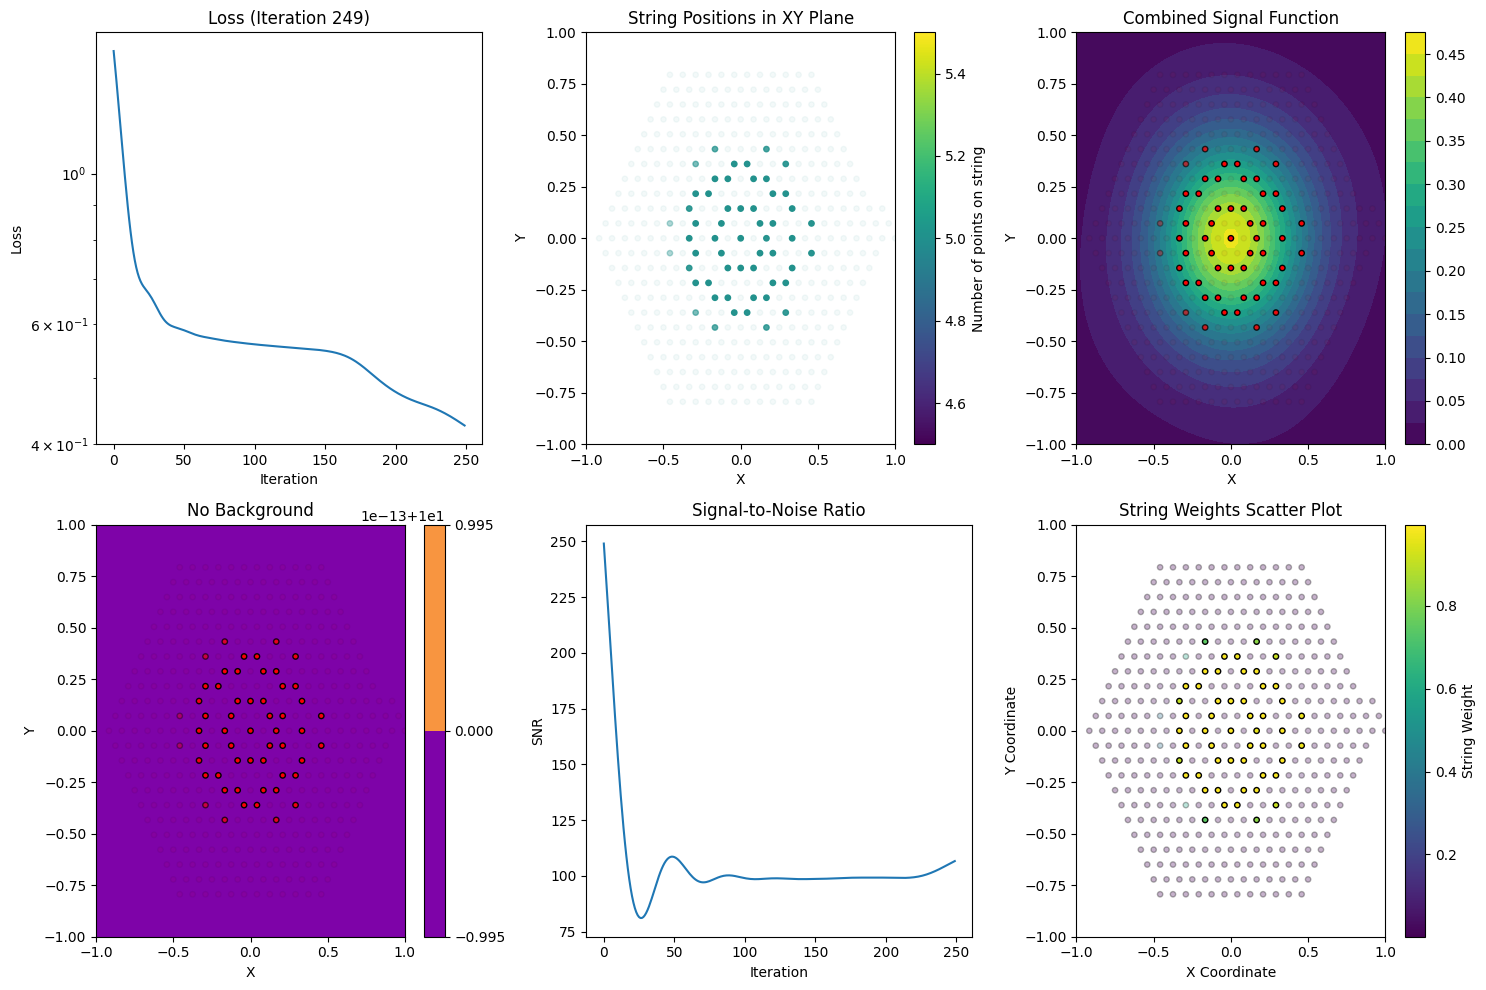

In [4]:
# Run the optimization using evanescent strings and weighted SNR loss
evanescent_results = evanescent_optimizer.optimize(
    geometry_type='evanescent_string',   
    loss_type='weighted_snr',  
    weights_learning_rate=0.1,  # Learning rate for string weights optimization
    string_repulsion_weight=0.004,
    max_local_rad=0.11,  # Maximum local radius for string repulsion 
    points_per_string=5,  # Number of points per string
    # weights_lr_scheduler_type='exp',    # Exponential learning rate decay for z-values optimizer
    # weights_lr_scheduler_params={'gamma': 0.95},                
    # initial_geometry_dict=no_bkg_snr_optimizer.clone().geom_dict, # Use the geometry from the previous optimization with built-in clone method
    # Geometric configuration
    n_strings=400,                     
    # total_points=150,                 
    optimize_positions_only=False,    
    even_distribution=True,
    min_dist=0.001,           
    
    # Optimization parameters
    num_iterations=250,              
    visualize_every=10,              
    multi_slice=True,               
    batch_size=2,                    
    # Training strategy
    alternating_training=True,       
    alternating_steps=10,            
    
    # SNR-specific parameters
    optimize_params=['phi', 'theta'],  
    num_background_funcs=10,            
    param_grid_size=30,                
    show_all_signals=False,
    snr_weight=30,
          
    
    # weighted SNR-specific + evanescent string-specific parameters
    eva_weight=0.03, # Weight for evanescent string loss term (focuses on minimizing the amount of strings)
    eva_boundary_weight=0, # Weight for evanescent string boundary penalty (focuses on keeping weights within [0,1])
    eva_binary_weight=0.001, # weight for binarization of string weights (if > 0, the string weights are binarized to 0 or 1)
    eva_string_num_weight=0.00002, # Weight for string number loss term (focuses on minimizing the number of strings)
    eva_min_num_strings=40, # Minimum number of strings for string number loss penalty (if the number of strings is more than this, the penalty is applied)       
    starting_weight=0.5, # Initial weight for strings 
    # Keep certain parameters constant
    keep_param_const={
        'x': [0,0],              
        'y': [0,0],             
        'z': [0,0],
        'amp': [1, 1]  # Amplitude of the signal functions           
    },
    
    # Additional parameters
    rand_params_in_grid=False,      
    plot_types=["loss", "string_xy", "signal_contour", "background_contour",  "snr_history", "string_weights_scatter"],
    make_gif=True,            
    gif_plot_selection=["loss", "string_xy", "signal_contour",'background_contour', "snr_history", "string_weights_scatter"], 
    gif_fps=10,         
    gif_filename='no_bkg_2_evanescent_optimization.gif'  
    
)

In [5]:
bkg_evanescent_optimizer = nugget.GeoOptimizer(
    dim=3,                       
    domain_size=2.0,                            
    # Common optimization parameters
    batch_size=2,                
    # learning_rate=0.01, # no need for these parameters, as they are not used in this optimization, but z values can be optimized        
    # repulsion_weight=0.000,   
    # boundary_weight=500,         
    # String-specific parameters
    
    optimize_xy=False, # can also optimize xy of all strings but this still needs to be tested              
    xy_learning_rate=0.05,  
           
    # SNR-specific parameters
    signal_scale=1.0, 
    n_strings=400,           
    background_scale=10.0,       
    
    precompute_snr=True,             
    no_background=False,       # Background functions included this time      
    # lr_scheduler_type='exp',     
    # lr_scheduler_params={'gamma': 0.95},
    # xy_lr_scheduler_type='exp', 
    # xy_lr_scheduler_params={'gamma': 0.95}
)

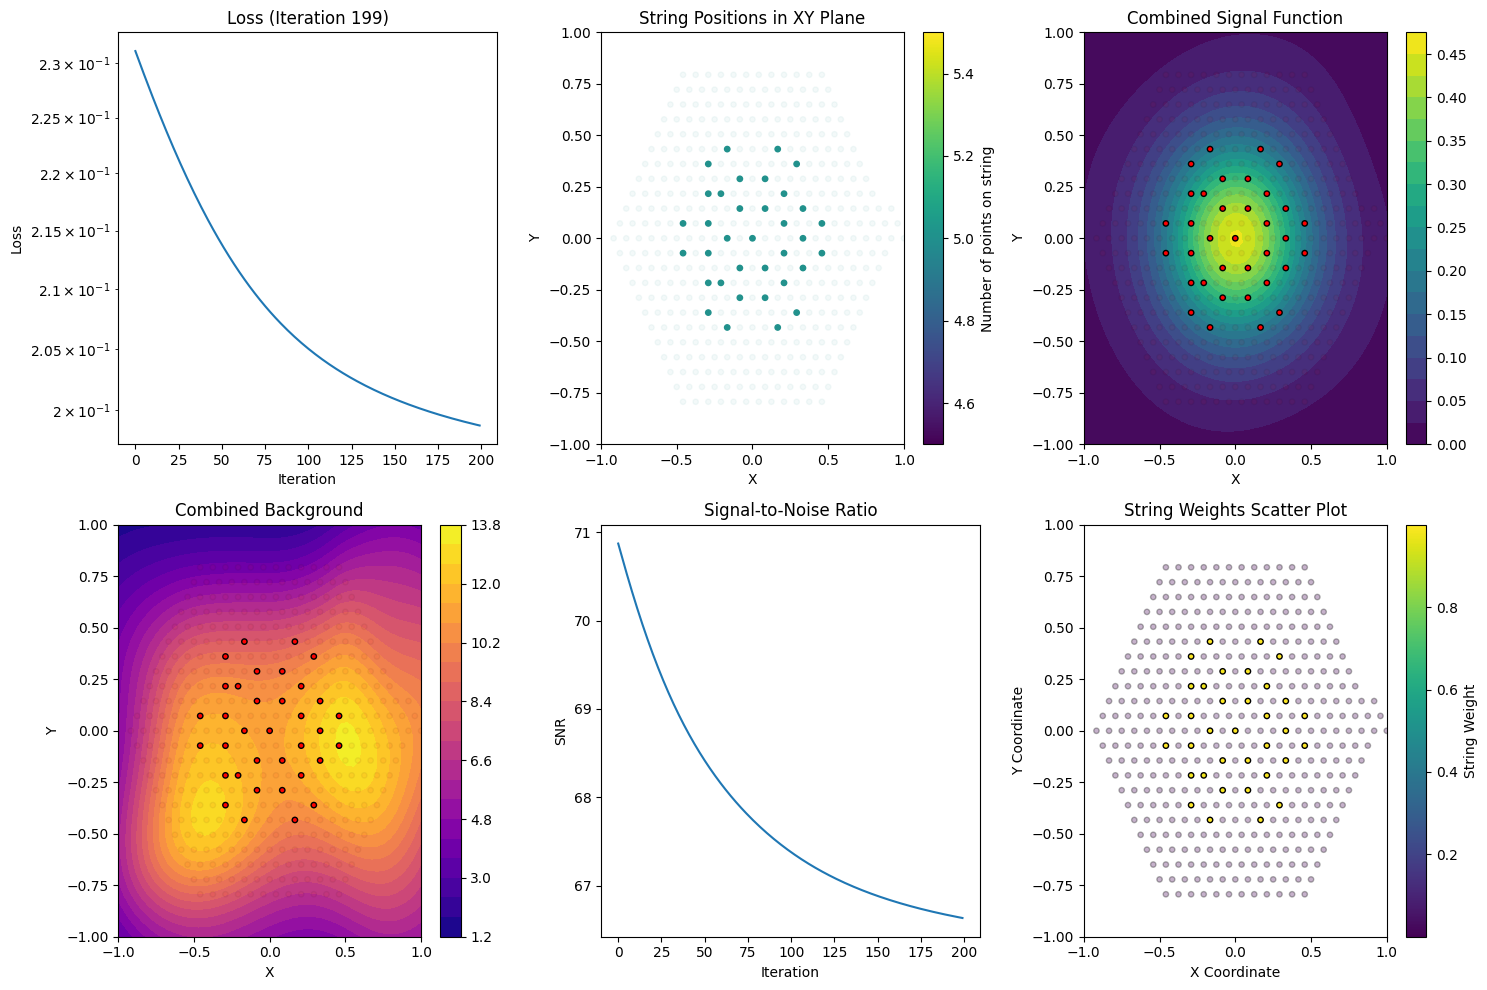

In [7]:
# Run the optimization using evanescent strings and weighted SNR loss
bkg_evanescent_results = bkg_evanescent_optimizer.optimize(
    geometry_type='evanescent_string',   
    loss_type='weighted_snr',
    initial_geometry_dict=bkg_evanescent_optimizer.clone().geom_dict,  
    weights_learning_rate=0.02,  # Learning rate for string weights optimization
    string_repulsion_weight=0.007,
    max_local_rad=0.11,  # Maximum local radius for string repulsion 
    points_per_string=5,  # Number of points per string
    # weights_lr_scheduler_type='exp',    # Exponential learning rate decay for z-values optimizer
    # weights_lr_scheduler_params={'gamma': 0.95},                
    # initial_geometry_dict=no_bkg_snr_optimizer.clone().geom_dict, # Use the geometry from the previous optimization with built-in clone method
    # Geometric configuration
    n_strings=400,                     
    # total_points=150,                 
    optimize_positions_only=False,    
    even_distribution=True,
    min_dist=0.001,           
    
    # Optimization parameters
    num_iterations=200,              
    visualize_every=10,              
    multi_slice=True,               
    batch_size=2,                    
    # Training strategy
    alternating_training=True,       
    alternating_steps=10,            
    
    # SNR-specific parameters
    optimize_params=['phi', 'theta'],  
    num_background_funcs=10,            
    param_grid_size=30,                
    show_all_signals=False,
    snr_weight=12,
          
    
    # weighted SNR-specific + evanescent string-specific parameters
    eva_weight=0.04, # Weight for evanescent string loss term (focuses on minimizing the amount of strings)
    eva_boundary_weight=0, # Weight for evanescent string boundary penalty (focuses on keeping weights within [0,1])
    eva_binary_weight=0.001, # weight for binarization of string weights (if > 0, the string weights are binarized to 0 or 1)
    eva_string_num_weight=0.00002, # Weight for string number loss term (focuses on minimizing the number of strings)
    eva_min_num_strings=40, # Minimum number of strings for string number loss penalty (if the number of strings is more than this, the penalty is applied)       
    starting_weight=0.5, # Initial weight for strings 
    # Keep certain parameters constant
    keep_param_const={
        'x': [0,0],              
        'y': [0,0],             
        'z': [0,0],
        'amp': [1, 1]  # Amplitude of the signal functions           
    },
    
    # Additional parameters
    rand_params_in_grid=False,      
    plot_types=["loss", "string_xy", "signal_contour", "background_contour",  "snr_history", "string_weights_scatter"],
    make_gif=True,            
    gif_plot_selection=["loss", "string_xy", "signal_contour",'background_contour', "snr_history", "string_weights_scatter"], 
    gif_fps=10,         
    gif_filename='bkg_3_evanescent_optimization.gif'  
    
)

## Visualize the optimized geometry with an interactive 3D plot

In [56]:
string_xy = evanescent_results['string_xy'][199].detach().numpy()
points = evanescent_results['points'].detach().numpy()
mask = (points[:,0] == string_xy[0]) & (points[:,1] == string_xy[1])
len(points[mask])

801

In [ ]:
# importlib.reload(vis)
# Create an interactive 3D plot if plotly is available
visualizer = vis.Visualizer(dim=3, domain_size=2.0)
fig = visualizer.create_interactive_3d_plot(
    points_3d=evanescent_results['points'],
    string_indices=evanescent_results['string_indices'],
    points_per_string_list=evanescent_results['points_per_string_list'],
    string_xy=evanescent_results['string_xy'],
    string_weights=evanescent_results['string_weights'],
)

# Display the figure
fig

Text(0, 0.5, 'Y Coordinate')

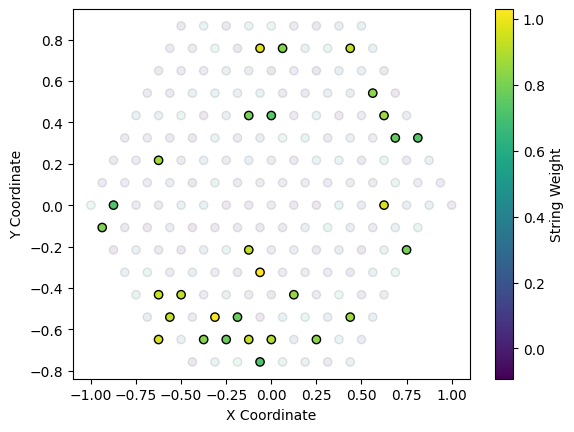

In [38]:
alphas = [1 if evanescent_results['string_weights'][i] > 0.7 else 0.1 for i in range(len(evanescent_results['string_weights']))]
plt.scatter(
    evanescent_results['string_xy'][:, 0].detach().numpy(),
    evanescent_results['string_xy'][:, 1].detach().numpy(),
    c=evanescent_results['string_weights'].detach().numpy(),
    cmap='viridis',
    alpha=alphas,
    edgecolors='k'
)
plt.colorbar(label='String Weight')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')



In [ ]:
importlib.reload(geom)
eva = geom.EvanescentString(
    n_strings=200,
    points_per_string=5,
    domain_size=2.0,
    dim=3
)
geom_dict = eva.initialize_points()